**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: *JESUS LIRA*

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [162]:
happiness=pd.read_csv('/content/drive/MyDrive/Data Scientist TLG/Visualizacion de datos con Python/happiness_report.csv')

3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [163]:
mexico=happiness[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region',inplace=True,drop=True)

4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

Text(6.595, 0, 'MEX')

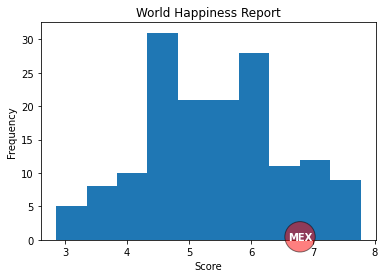

In [164]:
plt.hist(happiness['Score'])
plt.title('World Happiness Report')
plt.xlabel('Score')
plt.ylabel('Frequency')

value=mexico['Score'].values[0]
props_bbox={'boxstyle':'circle','facecolor':'red','alpha':0.5}
plt.text(value,0,'MEX',bbox=props_bbox,color='white',fontweight='bold')

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

Text(1.25, 0.861, 'MEX')

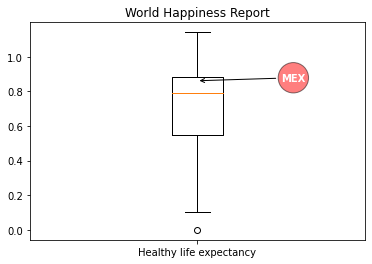

In [165]:
plt.boxplot(happiness['Healthy life expectancy'].dropna(),labels=['Healthy life expectancy'])
plt.title('World Happiness Report')

value=mexico['Healthy life expectancy'].values[0]
props_bbox={'boxstyle':'circle','facecolor':'red','alpha':0.5}
plt.annotate('MEX',xy=(1,value),xytext=(1.25,value),arrowprops={'arrowstyle':'->'},bbox=props_bbox,color='white',fontweight='bold')

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


Text(0.5, 1.0, 'Contribution in Mexico happiness score')

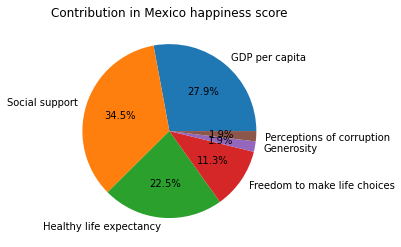

In [166]:
pie_mexico=mexico.reset_index(drop=True).T
pie_mexico.drop(['Score','Overall rank'],inplace=True)
pie_mexico.rename(columns={0:'Factors'},inplace=True)

plt.pie(pie_mexico,labels=pie_mexico.index,autopct='%1.1f%%')
plt.title('Contribution in Mexico happiness score')

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

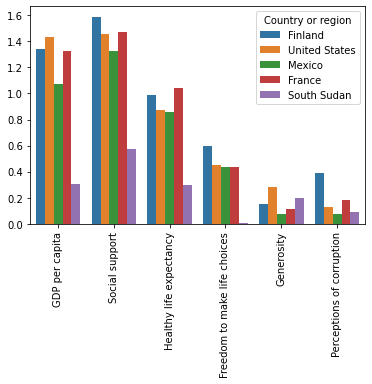

In [167]:
happiness.sort_values(by='Score',ascending=False,inplace=True,ignore_index=True)
highest=happiness.loc[0,'Country or region']
lowest=happiness.loc[len(happiness)-1,'Country or region']

five=happiness[happiness['Country or region'].isin(['Mexico',highest,lowest,'United States','France'])].copy()
five.drop(columns=['Overall rank','Score'],inplace=True)

five=pd.melt(five,id_vars='Country or region',ignore_index=True)

sns.barplot(data=five,x='variable',y='value',hue='Country or region')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)


8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

Text(0.5, 0.98, 'Contribution in happiness score')

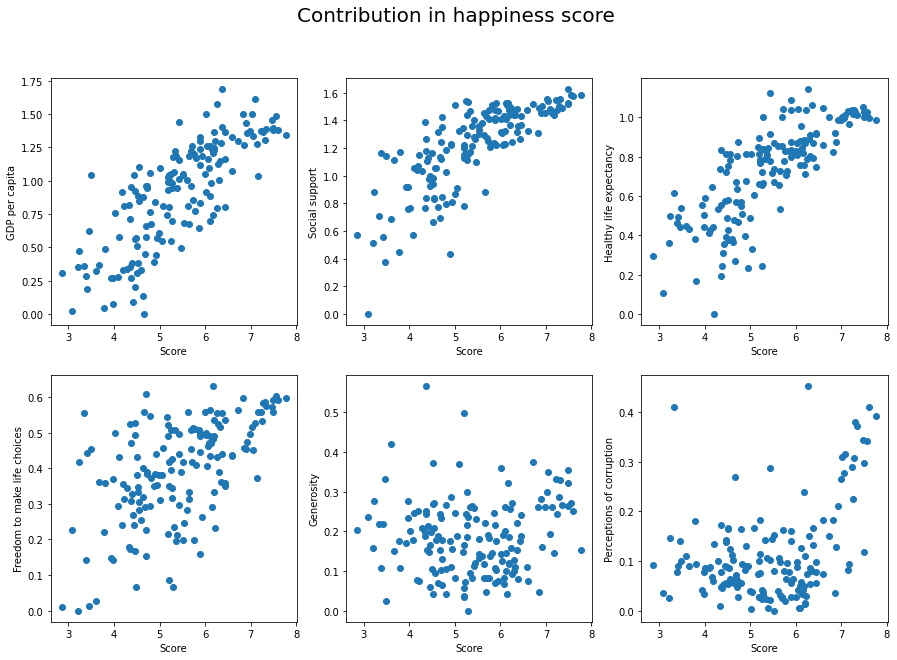

In [168]:
fig, axs = plt.subplots(2,3,figsize=(15,10))

axs[0,0].scatter(x=happiness['Score'],y=happiness['GDP per capita'])
axs[0,0].set_xlabel('Score')
axs[0,0].set_ylabel('GDP per capita')

axs[0,1].scatter(x=happiness['Score'],y=happiness['Social support'])
axs[0,1].set_xlabel('Score')
axs[0,1].set_ylabel('Social support')

axs[0,2].scatter(x=happiness['Score'],y=happiness['Healthy life expectancy'])
axs[0,2].set_xlabel('Score')
axs[0,2].set_ylabel('Healthy life expectancy')

axs[1,0].scatter(x=happiness['Score'],y=happiness['Freedom to make life choices'])
axs[1,0].set_xlabel('Score')
axs[1,0].set_ylabel('Freedom to make life choices')

axs[1,1].scatter(x=happiness['Score'],y=happiness['Generosity'])
axs[1,1].set_xlabel('Score')
axs[1,1].set_ylabel('Generosity')

axs[1,2].scatter(x=happiness['Score'],y=happiness['Perceptions of corruption'])
axs[1,2].set_xlabel('Score')
axs[1,2].set_ylabel('Perceptions of corruption')

fig.suptitle('Contribution in happiness score',fontsize=20)

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

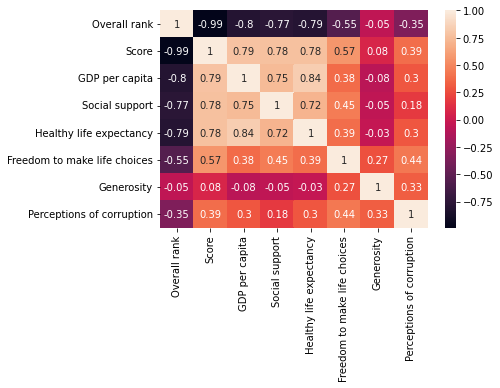

In [169]:
sns.heatmap(round(happiness.corr(),2),annot=True)

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

Text(0.5, 1.0, 'World Happiness Report')

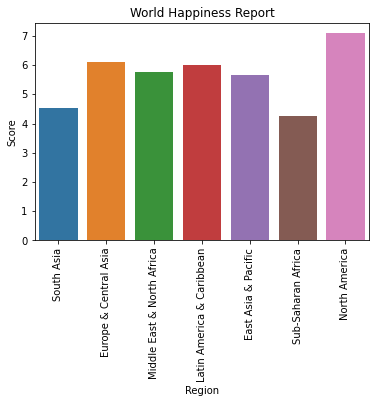

In [170]:
metadata=pd.read_csv('/content/drive/MyDrive/Data Scientist TLG/Visualizacion de datos con Python/Metadata.csv')
metadata.rename(columns={'TableName':'Country or region'},inplace=True)

union=metadata.merge(happiness,on='Country or region')

sns.barplot(data=union,x='Region',y='Score',estimator=np.mean,ci=None)
plt.xticks(rotation=90)
plt.title('World Happiness Report')
